### charger des modules

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Préparer et recueillir des données

In [31]:
import os

path = os.listdir('brain_tumor/Training/')
print(path)
classes = {'no_tumor':0, 'pituitary_tumor':1}

['no_tumor', 'pituitary_tumor']


In [32]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [63]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape((X.shape[0], 40000))

In [64]:
np.unique(Y)

array([0, 1])

In [65]:
pd.Series(Y).value_counts()

1    827
0    395
Name: count, dtype: int64

In [66]:
print(type(X))

print(X.size)

<class 'numpy.ndarray'>
48880000


In [67]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

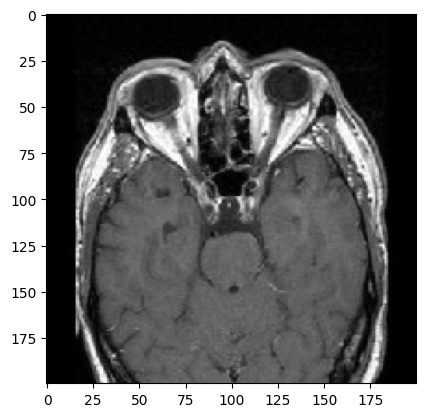

In [69]:
plt.imshow(X[0], cmap='gray')

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, shuffle=False, stratify=None,random_state=10,
                                               test_size=.40)

In [71]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0


In [72]:
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())


1.0 0.0
1.0 0.0


In [73]:
from sklearn.decomposition import PCA

In [74]:
print(xtrain.shape, xtest.shape)

pca = PCA(2)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)


(733, 40000) (489, 40000)


In [75]:
print(pca_train.shape, pca_test.shape)
print(pca.n_components)


(733, 2) (489, 2)
2


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [77]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [78]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [79]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)


RandomForestClassifier()

In [80]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8261758691206544


In [81]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9945429740791268
Testing Score: 0.8670756646216768


In [82]:
print("Training Score:", rf.score(xtrain, ytrain))
print("Testing Score:", rf.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8773006134969326


In [83]:
pred = sv.predict(xtest)


In [85]:
import pickle

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[0]
[1]
[1]


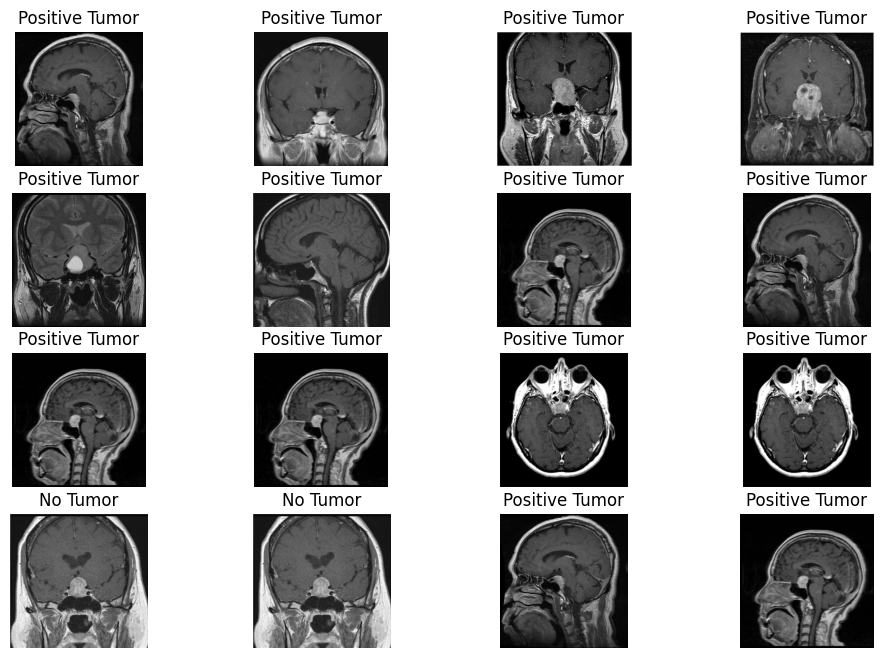

In [86]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    print(p)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [87]:
with open('model.pkl', 'wb') as f:
    pickle.dump(sv, f)

In [88]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

### Test to App

(-0.5, 275.5, 319.5, -0.5)

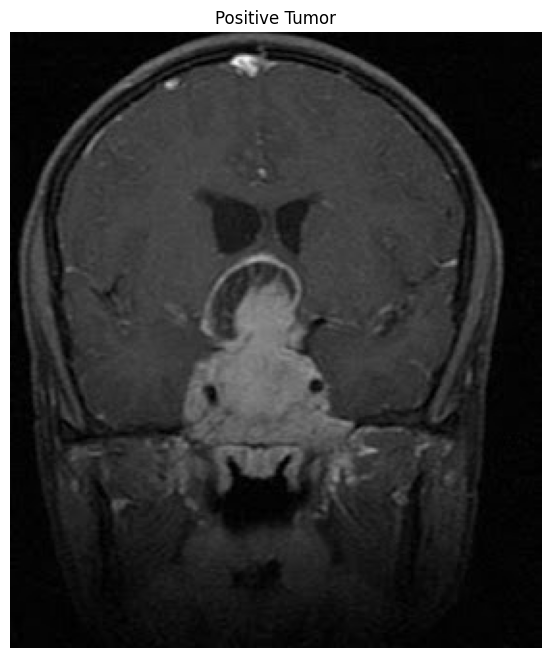

In [126]:
dec = {0:'No Tumor', 1:'Positive Tumor'}
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1 
img = cv2.imread('brain_tumor/Testing/pituitary_tumor/image(8).jpg')

# resize the image to (200, 200)
img1 = cv2.resize(img, (200, 200))

# flatten the image and normalize the pixel values
img_flat = img1.reshape(-1) / 255.0

# pad the flattened image with zeros to make it have 40000 features
if len(img_flat) < 40000:
    padded_img = np.pad(img_flat, (0, 40000 - len(img_flat)), 'constant')
else:
    padded_img = img_flat[:40000]

# reshape the padded image to (1, 40000)
padded_img = padded_img.reshape(1, -1)

# make the prediction using the model
p = model.predict(padded_img)
plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')


In [61]:
train_test_split(Y, shuffle=False)

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 